In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data preparation

In [17]:
mean_01 = np.array([1,.5])
cov_01 = np.array([[1, .1], [.1, .2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.21, .1], [.1, 1.3]])

In [18]:
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 400)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 400)

visualise


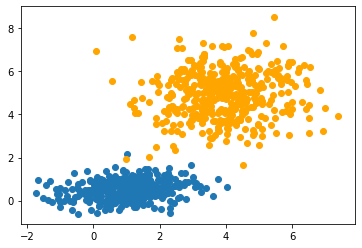

In [19]:
plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'orange')
plt.show()

In [20]:
total = dist_01.shape[0] + dist_02.shape[0]

data = np.zeros((total, 3))
data[:400, :-1] = dist_01
data[400:, :-1] = dist_02
data[400:, -1] = 1

In [21]:
np.random.shuffle(data)
print(data)

[[ 2.1874046   0.89769027  0.        ]
 [ 2.5969431   3.55998543  1.        ]
 [ 0.3677367   0.85040824  0.        ]
 ...
 [ 2.26621518  4.34471085  1.        ]
 [ 1.35531797 -0.06026431  0.        ]
 [ 3.58209117  6.24997888  1.        ]]


In [22]:
x_train = data[:600, :-1]
y_train = data[:600, -1]

x_test = data[600:, :-1]
y_test = data[600:, -1]

Algorithm

In [23]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-.1*z))

In [24]:
def hypothesis(x, theta):
    return sigmoid(np.dot(x, theta))

In [25]:
def error(x, y, theta):
    
    m = x.shape[0]
    err = 0
    
    for i in range(m):
        hy = hypothesis(x[i], theta)
        
        err += y[i]*np.log2(hy) + (1 - y[i])*np.log2(1 - hy)
        
    return err/m #average loss

In [62]:
def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        grad += (Y[i] - y_hat)*X[i]
        print(x[i].shape)
        
    return grad/m #Average Gradient

In [65]:
def gradient_descent(x, y, learning_rate=.001):
    
    theta = np.zeros((x.shape[1], 1))
    err_list = []
    
    for i in range(500):
        
        theta = theta + learning_rate*get_grad(x, y, theta)
        e = error(x, y, theta)
        err_list.append(e)
        
    return theta, err_list

In [66]:
f_theta, err = gradient_descent(x_train, y_train)
print(f_theta)

ValueError: non-broadcastable output operand with shape (2,1) doesn't match the broadcast shape (2,2)